The project is about ....

Dataset is : AI vs Human Text

In [1]:
import pandas as pd
import csv
df = pd.read_csv('/content/AI_Human.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip')

print(df.head())

                                                                                                                                                    text  \
"Cars. Cars have been around since they became ... when Henry Ford created and built the first Mod...   people are starting to question if limiting c...   
"""America's love affair with it's vehicles see... it is easier to suggest that America's car usag...   along with a decrease in pollution and depend...   
"The electrol college system is an unfair system   people don't have the right to select their own...   they dont have the right to select a presiden...   
In source two and three it states the rule "" w... winning can take it all                              that vote that they take from the losing does...   
In conclusion                                      the state senators should eliminate the elector...   and don't count other votes that is not popul...   

                                                               

In [2]:
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['generated_word_count'] = df['generated'].apply(lambda x: len(str(x).split()))

df['text_char_count'] = df['text'].apply(lambda x: len(str(x)))
df['generated_char_count'] = df['generated'].apply(lambda x: len(str(x)))

print(df[['text_word_count', 'generated_word_count', 'text_char_count', 'generated_char_count']].head())

                                                                                                       text_word_count  \
"Cars. Cars have been around since they became ... when Henry Ford created and built the first Mod...               16   
"""America's love affair with it's vehicles see... it is easier to suggest that America's car usag...                8   
"The electrol college system is an unfair system   people don't have the right to select their own...               10   
In source two and three it states the rule "" w... winning can take it all                                          31   
In conclusion                                      the state senators should eliminate the elector...               50   

                                                                                                       generated_word_count  \
"Cars. Cars have been around since they became ... when Henry Ford created and built the first Mod...                    12   
"""America's 

In [3]:
df['word_difference'] = df['text_word_count'] - df['generated_word_count']
df['char_difference'] = df['text_char_count'] - df['generated_char_count']
print(df[['text', 'generated', 'word_difference', 'char_difference']].head())

                                                                                                                                                    text  \
"Cars. Cars have been around since they became ... when Henry Ford created and built the first Mod...   people are starting to question if limiting c...   
"""America's love affair with it's vehicles see... it is easier to suggest that America's car usag...   along with a decrease in pollution and depend...   
"The electrol college system is an unfair system   people don't have the right to select their own...   they dont have the right to select a presiden...   
In source two and three it states the rule "" w... winning can take it all                              that vote that they take from the losing does...   
In conclusion                                      the state senators should eliminate the elector...   and don't count other votes that is not popul...   

                                                               

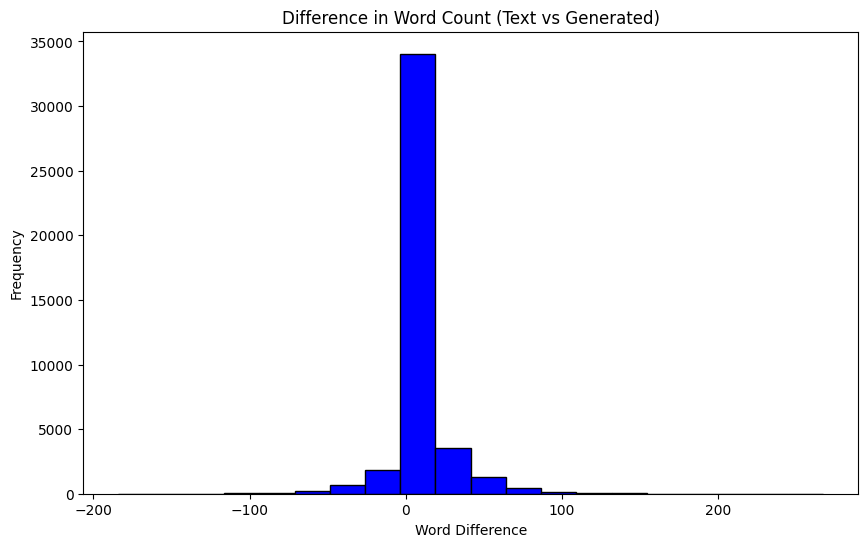

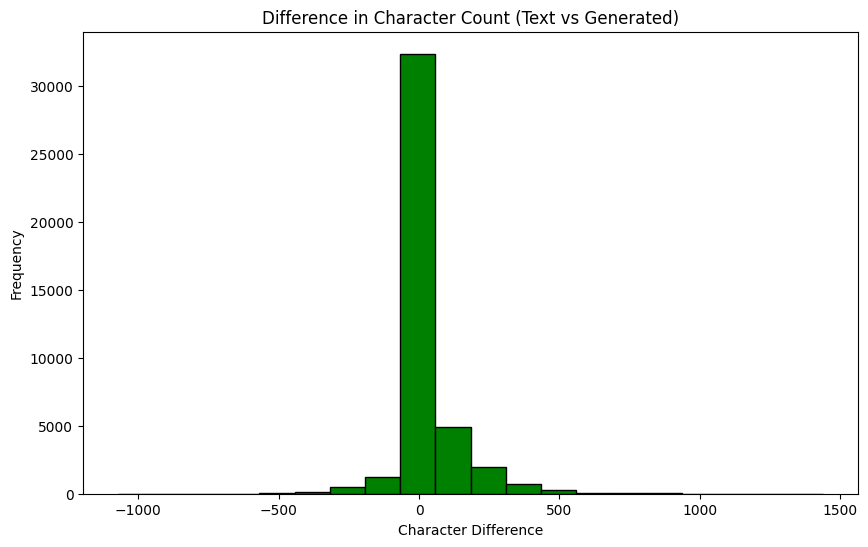

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['word_difference'], bins=20, color='blue', edgecolor='black')
plt.title('Difference in Word Count (Text vs Generated)')
plt.xlabel('Word Difference')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['char_difference'], bins=20, color='green', edgecolor='black')
plt.title('Difference in Character Count (Text vs Generated)')
plt.xlabel('Character Difference')
plt.ylabel('Frequency')
plt.show()

In [5]:
import torch
print(torch.cuda.is_available())

True


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import cudf

data = cudf.read_csv('/content/AI_Human.csv')

# عرض أول 5 صفوف للتحقق من البيانات
print(data.head())

                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0


In [9]:
# ميزات (الـ input) هي النصوص في عمود 'text'
X = data['text']

# الهدف (الـ target) هو العمود 'generated'
y = data['generated']

In [10]:
from cuml.feature_extraction.text import TfidfVectorizer
import cupy as cp

vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

X_transformed_cp = cp.sparse.csr_matrix(X_transformed)
print(X_transformed_cp.shape)

(23949, 65049)


In [11]:
import cudf
from cuml.feature_extraction.text import TfidfVectorizer
import cupy as cp

vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# تحويل إلى cupy بدلاً من NumPy
X_transformed_cudf = cudf.DataFrame.from_records(cp.asnumpy(X_transformed.toarray()))

# التحقق من شكل البيانات
print(X_transformed_cudf.shape)

(23949, 65049)


In [12]:
# استخدام عينة أصغر من البيانات
X_small = X[:100000]  # أخذ أول 100,000 صف فقط
y_small = y[:100000]

# ثم تابع مع التحويل والتدريب كما هو موضح في الخطوات السابقة

In [13]:
from cuml.feature_extraction.text import TfidfVectorizer  # تأكد من الاستيراد بشكل صحيح

# أخذ عينة من البيانات
X_small = X[:100000]
y_small = y[:100000]

# استخدام cuML TfidfVectorizer مع العينة
vectorizer = TfidfVectorizer(max_features=2000)
X_transformed = vectorizer.fit_transform(X_small)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# استخدام sklearn TfidfVectorizer بدلاً من cuML
vectorizer = TfidfVectorizer(max_features=2000)
X_transformed = vectorizer.fit_transform(X_small)

TypeError: Series object is not iterable. Consider using `.to_arrow()`, `.to_pandas()` or `.values_host` if you wish to iterate over the values.

In [ ]:
# تقليل عدد السجلات
X_small = X[:50000]  # أخذ أول 50,000 صف فقط
y_small = y[:50000]

# تقليل عدد الميزات أكثر
vectorizer = cuTfidfVectorizer(max_features=1000)
X_transformed = vectorizer.fit_transform(X_small)

In [ ]:
import cudf
import cupy as cp
from cuml.decomposition import TruncatedSVD
X_dense = X_transformed.toarray()

# تقليل الأبعاد باستخدام TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_transformed_svd = svd.fit_transform(X_dense)

# تأكد من أن الأبعاد قد تم تقليصها بنجاح
print(X_transformed_svd.shape)

In [ ]:
from cuml.naive_bayes import MultinomialNB
from cuml.linear_model import LogisticRegression
from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score
import matplotlib.pyplot as plt

nb_model = MultinomialNB()
nb_model.fit(X_transformed_svd, y_small)

nb_pred = nb_model.predict(X_transformed_svd)
nb_accuracy = accuracy_score(y_small, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

lr_model = LogisticRegression()
lr_model.fit(X_transformed_svd, y_small)

lr_pred = lr_model.predict(X_transformed_svd)
lr_accuracy = accuracy_score(y_small, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

rf_model = RandomForestClassifier()
rf_model.fit(X_transformed_svd, y_small)

rf_pred = rf_model.predict(X_transformed_svd)
rf_accuracy = accuracy_score(y_small, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

models = ['Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [nb_accuracy, lr_accuracy, rf_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
import cupy as cp
import time
from cuml.naive_bayes import MultinomialNB
from cuml.linear_model import LogisticRegression
from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score

gpu_before_free, gpu_before_total = cp.cuda.runtime.memGetInfo()

start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_transformed_svd, y_small)
nb_pred = nb_model.predict(X_transformed_svd)
nb_accuracy = accuracy_score(y_small, nb_pred)
end_time = time.time()

gpu_after_free, gpu_after_total = cp.cuda.runtime.memGetInfo()
gpu_memory_used = gpu_after_total - gpu_before_total

print(f"Naive Bayes Training Time: {end_time - start_time} seconds")
print(f"Naive Bayes Memory Used: {gpu_memory_used} bytes")

start_time = time.time()
lr_model = LogisticRegression()
lr_model.fit(X_transformed_svd, y_small)
lr_pred = lr_model.predict(X_transformed_svd)
lr_accuracy = accuracy_score(y_small, lr_pred)
end_time = time.time()

gpu_after_free, gpu_after_total = cp.cuda.runtime.memGetInfo()
gpu_memory_used = gpu_after_total - gpu_before_total

print(f"Logistic Regression Training Time: {end_time - start_time} seconds")
print(f"Logistic Regression Memory Used: {gpu_memory_used} bytes")

start_time = time.time()
rf_model = RandomForestClassifier()
rf_model.fit(X_transformed_svd, y_small)
rf_pred = rf_model.predict(X_transformed_svd)
rf_accuracy = accuracy_score(y_small, rf_pred)
end_time = time.time()

gpu_after_free, gpu_after_total = cp.cuda.runtime.memGetInfo()
gpu_memory_used = gpu_after_total - gpu_before_total

print(f"Random Forest Training Time: {end_time - start_time} seconds")
print(f"Random Forest Memory Used: {gpu_memory_used} bytes")

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from cuml.metrics import accuracy_score
import time

# تحويل البيانات إلى تنسيق DMatrix
dtrain = xgb.DMatrix(X_transformed_svd, label=y_small)
dtest = xgb.DMatrix(X_transformed_svd, label=y_small)

# إعدادات XGBoost مع دعم GPU
params = {
    'tree_method': 'hist',  # استخدام GPU للتدريب مع "hist" بدلاً من "gpu_hist"
    'device': 'cuda',  # تحديد الجهاز لاستخدام CUDA (GPU)
    'objective': 'binary:logistic',  # التصنيف الثنائي
    'eval_metric': 'logloss',
}

# تدريب النموذج
start_time = time.time()
bst = xgb.train(params, dtrain, num_boost_round=100)

# التنبؤ
y_pred = bst.predict(dtest)

# تحويل التنبؤات إلى تصنيفات (0 أو 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# حساب دقة النموذج
accuracy = accuracy_score(y_small, y_pred_binary)
end_time = time.time()

print(f"XGBoost Training Time: {end_time - start_time} seconds")
print(f"XGBoost Accuracy: {accuracy}")

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# تحويل البيانات إلى تنسيق DMatrix
dtrain = xgb.DMatrix(X_transformed_svd, label=y_small)

# إعدادات XGBoost مع دعم GPU
params = {
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# استخدام cross-validation للحصول على تقييم أكثر دقة
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics="logloss", as_pandas=True)

# عرض نتائج cross-validation
print(cv_results.tail())

# الدقة المحسوبة عبر cross-validation
cv_accuracy = cv_results['test-logloss-mean'].min()
print(f"XGBoost Cross-Validation Accuracy (Logloss): {cv_accuracy}")